In [17]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [18]:
SF_data = pd.read_excel('SF_meetbot.xlsx')
directory_data_SF = pd.read_csv('../data/San Francisco/directory_data.csv')
directory_data_PA = pd.read_csv('../data/Palo Alto/directory_data.csv')

directory_data = pd.concat([directory_data_PA, directory_data_SF])


SF_data = SF_data[SF_data['Employment Status'] == 'Full time']
print(len(SF_data))
SF_data[SF_data['Last name, First name'] == 'Nash, Lisa']

372


,Employee #,"Last name, First name",Employment Status,Employment Status: Date,Division,Department,Physical Location
286,6702,"Nash, Lisa",Full time,2017-10-16,SF Hatchery,General,San Francisco


In [19]:
pa_remove_IDs = [2215, 3925, 1124, 3966, 4493, 5154, 5487, 5052, 1832, 7112] 
'''Peter Bronk, Kayvon Shakeri, James Feurher egutierrez@ideo.com jthomas@ideo.com
kkwong@ideo.com
kykwong@ideo.com
myuan@ideo.com
rwarne@ideo.com
tcadiz@ideo.com
tyuan@ideo.com
svenkat@ideo.com
dstrong@ideo.com'''

health_IDS = [6373, 1054, 7086, 
              5553, 4962, 1717, 
              6905, 2091, 4495, 
              1026, 6845, 5122, 
              3791, 6366, 6423, 
              6848, 7106, 6263]

print('length before ', len(SF_data))
SF_data = SF_data[SF_data['Division'] != 'Play Lab']
print('length after', len(SF_data))

length before  372
length after 357


In [20]:
SF_data.head()

,Employee #,"Last name, First name",Employment Status,Employment Status: Date,Division,Department,Physical Location
0,2047,"Adams, Matthew",Full time,2000-05-08,Palo Alto,General,Palo Alto
1,3895,"Adranly, Rochael",Full time,2015-01-01,Global,Legal,San Francisco
2,6432,"Ahmadian , Alisa",Full time,2016-10-17,SF OpenIDEO,General,San Francisco
3,5182,"Alba, Katherine",Full time,2017-01-01,IDEO U,General,San Francisco
4,3111,"Aleta, Joshua",Full time,2005-11-07,Palo Alto,General,Palo Alto


In [21]:
SF_data.loc[SF_data['Employee #'].isin(health_IDS), 'Division'] = 'SF Health'

In [22]:
SF_data.loc[SF_data['Employee #'].isin(health_IDS), 'Division']

7      SF Health
39     SF Health
41     SF Health
58     SF Health
84     SF Health
87     SF Health
107    SF Health
118    SF Health
253    SF Health
261    SF Health
271    SF Health
292    SF Health
323    SF Health
365    SF Health
370    SF Health
430    SF Health
440    SF Health
Name: Division, dtype: object

In [23]:
print(len(SF_data))
SF_data = SF_data[~SF_data['Employee #'].isin(pa_remove_IDs)]
print(len(SF_data))

357
347


In [24]:
full_SF = SF_data.copy()

In [25]:
directory_data.head()

,business_lead_em_id,discipline,em_id,email_address,employee_type,first_name,hired_at,id,is_active,journey_role,last_name,title,visible_in_newtube
0,1629.0,Mechanical Engineering,2091,jfourt@ideo.com,employee,Jesse,2000-06-19,64,True,Senior Portfolio Director,Fourt,Director,True
1,5553.0,Design Research,7106,jwatterson@ideo.com,employee,Jessica,2018-10-15,55,True,Senior Designer,Watterson,Individual,True
2,5276.0,Interaction Design,5400,jstykow@ideo.com,employee,Jetti,2014-03-17,59,True,Senior Design Lead,Stykow,Team,True
3,1528.0,Prototyping,1124,jimf@ideo.com,employee,Jim,1992-05-18,69,True,Principal Designer,Feuhrer,Individual,True
4,1397.0,Mechanical Engineering,1022,jimy@ideo.com,temporary,Jim,2018-07-27,64,True,Senior Design Director,Yurchenco,Director,True


In [26]:
SF_data = SF_data.merge(directory_data, left_on = 'Employee #', right_on = 'em_id')
print(len(SF_data))

337


In [27]:
full_SF[~full_SF['Employee #'].isin(SF_data['Employee #'].values)] # this list should be empty with a data refresh


,Employee #,"Last name, First name",Employment Status,Employment Status: Date,Division,Department,Physical Location
217,6358,"Kunzelman, Kaley",Full time,2019-03-04,Palo Alto,General,Palo Alto
240,7245,"Listana, Nicu",Full time,2019-05-06,IDEO Products,Products Team,San Francisco
242,7255,"Liu, Louisa",Full time,2019-05-06,Global,Talent,San Francisco
285,6531,"Napit, Angela",Full time,2018-08-01,SF Food,General,San Francisco
286,6702,"Nash, Lisa",Full time,2017-10-16,SF Hatchery,General,San Francisco
306,2956,"Parviainen, Juho",Full time,2012-09-03,SF Hatchery,General,San Francisco
327,6715,"Rao, Grishma",Full time,2017-12-01,SF Hatchery,General,San Francisco
406,7264,"Thommen, Summer",Full time,2019-05-06,SF OS,General,San Francisco
407,7267,"Tilghman, Preston",Full time,2019-05-13,SF D4L,General,San Francisco
427,7276,"Walker, Chris",Full time,2019-06-03,SF D4L,General,San Francisco


In [28]:


SF_data['years_worked_here'] = (np.datetime64('today') - SF_data['Employment Status: Date'].values).astype('timedelta64[D]') / np.timedelta64(1, 'D')
SF_data['years_worked_here'] = SF_data['years_worked_here']/365.

In [29]:
SF_data

,Employee #,"Last name, First name",Employment Status,Employment Status: Date,Division,Department,Physical Location,business_lead_em_id,discipline,em_id,...,employee_type,first_name,hired_at,id,is_active,journey_role,last_name,title,visible_in_newtube,years_worked_here
0,2047,"Adams, Matthew",Full time,2000-05-08,Palo Alto,General,Palo Alto,1397.0,Mechanical Engineering,2047,...,employee,Matt,2000-05-08,64,True,Senior Portfolio Director,Adams,Director,True,19.158904
1,3895,"Adranly, Rochael",Full time,2015-01-01,Global,Legal,San Francisco,1832.0,Legal,3895,...,employee,Rochael,2015-01-01,60,True,General Counsel and Legal Design Lead,Adranly,Enterprise,True,4.498630
2,6432,"Ahmadian , Alisa",Full time,2016-10-17,SF OpenIDEO,General,San Francisco,5479.0,Business Development,6432,...,employee,Alisa,2016-10-17,42,True,Senior Business Development Associate,Ahmadian,Individual,True,2.704110
3,5182,"Alba, Katherine",Full time,2017-01-01,IDEO U,General,San Francisco,6248.0,Product Owner,5182,...,employee,Katie,2013-06-25,84,True,Senior Product Lead,Alba,Team,True,2.495890
4,3111,"Aleta, Joshua",Full time,2005-11-07,Palo Alto,General,Palo Alto,1528.0,Coordination,3111,...,employee,Joshua,2005-11-07,71,True,Coordinator,Aleta,Individual,True,13.654795
5,4541,"Alley, Robyn",Full time,2016-07-25,SF Hatchery,General,San Francisco,2906.0,Interaction Design,4541,...,employee,Robyn,2011-12-05,59,True,Senior Design Lead,Alley,Team,True,2.934247
6,6788,"Amyx, Amanda",Full time,2018-03-19,SF D4C,General,San Francisco,2602.0,Design Research,6788,...,employee,Amanda,2018-03-19,55,True,Principal Designer,Amyx,Individual,True,1.284932
7,6373,"Ang, Kimberly",Full time,2016-07-18,SF Health,General,Palo Alto,6078.0,Business Development,6373,...,employee,Kimberly,2016-07-18,42,True,Senior Business Development Lead,Ang,Team,True,2.953425
8,6278,"Appenzeller, Benjamin",Full time,2017-09-11,SF Hatchery,General,San Francisco,2906.0,Business Design,6278,...,employee,Ben,2016-05-02,41,True,Senior Design Lead,Appenzeller,Team,True,1.802740
9,7138,"Argenio, Alessandro",Full time,2018-11-12,SF D4L,General,San Francisco,3238.0,Interaction Design,7138,...,employee,Ale,2018-11-12,59,True,Design Lead,Argenio,Team,True,0.632877


In [30]:
def recode_disciplines(normal_df):
    # recodes support disicplines
    support_discipline_list = [{'discipline': {'Talent': 'Support'}},
                               {'discipline': {'Marketing': 'Support'}},
                               {'discipline': {'Coordination': 'Support'}},
                               {'discipline': {'Experience': 'Support'}},
                               {'discipline': {'Accounting': 'Support'}},
                               {'discipline': {'Community': 'Support'}},
                               {'discipline': {'Technology': 'Support'}},
                               {'discipline': {'Comm Design - Graphic': 'Comm Design'}},
                               {'discipline': {'Comm Design - Media': 'Comm Design'}},
                               {'discipline': {'Comm Design - Writing': 'Comm Design'}},
                               {'discipline': {'Communication Design': 'Comm Design'}}
                              
                              ]
    recoded_df = normal_df.copy()
    
    for i in range(len(support_discipline_list)):
        replacement_dict = support_discipline_list[i]
        recoded_df = recoded_df.replace(to_replace=replacement_dict)

    return recoded_df

In [31]:
recoded_SF = recode_disciplines(SF_data)

In [32]:
set(recoded_SF.discipline.values)

{'Brand',
 'Business Design',
 'Business Development',
 'Business Operations',
 'Comm Design',
 'Data Science',
 'Design Research',
 'Electrical Engineering',
 'Environments Design',
 'Food Science',
 'Healthcare',
 'Industrial Design',
 'Interaction Design',
 'Legal',
 'Mechanical Engineering',
 'Operations',
 'Organization Design',
 'Product Design',
 'Product Owner',
 'Production Design',
 'Prototyping',
 'Software Design',
 'Support',
 'Systems Design'}

In [33]:
SF_data.head()

,Employee #,"Last name, First name",Employment Status,Employment Status: Date,Division,Department,Physical Location,business_lead_em_id,discipline,em_id,...,employee_type,first_name,hired_at,id,is_active,journey_role,last_name,title,visible_in_newtube,years_worked_here
0,2047,"Adams, Matthew",Full time,2000-05-08,Palo Alto,General,Palo Alto,1397.0,Mechanical Engineering,2047,...,employee,Matt,2000-05-08,64,True,Senior Portfolio Director,Adams,Director,True,19.158904
1,3895,"Adranly, Rochael",Full time,2015-01-01,Global,Legal,San Francisco,1832.0,Legal,3895,...,employee,Rochael,2015-01-01,60,True,General Counsel and Legal Design Lead,Adranly,Enterprise,True,4.498630
2,6432,"Ahmadian , Alisa",Full time,2016-10-17,SF OpenIDEO,General,San Francisco,5479.0,Business Development,6432,...,employee,Alisa,2016-10-17,42,True,Senior Business Development Associate,Ahmadian,Individual,True,2.704110
3,5182,"Alba, Katherine",Full time,2017-01-01,IDEO U,General,San Francisco,6248.0,Product Owner,5182,...,employee,Katie,2013-06-25,84,True,Senior Product Lead,Alba,Team,True,2.495890
4,3111,"Aleta, Joshua",Full time,2005-11-07,Palo Alto,General,Palo Alto,1528.0,Coordination,3111,...,employee,Joshua,2005-11-07,71,True,Coordinator,Aleta,Individual,True,13.654795


In [34]:
with open('../data/San Francisco/project_json.json') as json_data:
    project_lists_SF = json.load(json_data)
    
with open('../data/Palo Alto/project_json.json') as json_data:
    project_lists_PA = json.load(json_data)
    
project_lists = dict(project_lists_SF, **project_lists_PA)

In [35]:
project_lists

{'CDomina@ideo.com': [13743,
  9667,
  294,
  3997,
  2337,
  3158,
  6723,
  11752,
  17337,
  26585,
  11793,
  26096,
  13381,
  24810,
  24308,
  12605,
  10858,
  18131,
  20178,
  17235,
  4420,
  5989,
  16247,
  12786,
  3,
  28248,
  339,
  3774,
  23878,
  25291,
  24199,
  26513,
  1278,
  5210,
  5093,
  5350,
  13760,
  14098,
  2278,
  2328,
  2282,
  2534,
  11909,
  11897,
  517,
  2981,
  3669,
  3775,
  3336,
  5449,
  5575,
  5576,
  26157,
  21414,
  951,
  17429,
  25999,
  1540,
  7476,
  2625,
  14863,
  14568,
  5460,
  14316,
  7970,
  10031,
  17716,
  5045,
  2409,
  17821,
  2615,
  26719,
  6066,
  2660,
  19004,
  24282,
  14897,
  5604,
  1332,
  3487,
  1077,
  11768,
  20778,
  1477,
  1277,
  18594,
  15675,
  7697,
  3340,
  3140,
  23785,
  14064,
  1322,
  5952,
  14758,
  17393,
  3887,
  4007,
  13288,
  14308,
  25249,
  24938,
  2952,
  21353,
  20249,
  16102,
  18268,
  18847,
  17442,
  25070,
  25039,
  1983,
  5891,
  5685,
  20930,
  15051

In [36]:
random_emp = SF_data.sample(frac=1)
random_emp_num = random_emp['Employee #'].values
print(len(random_emp_num))
print(len(random_emp_num)//3 * 3)
random_emp_num_short = random_emp_num[:len(random_emp_num)//3 * 3]

print(random_emp_num_short)

337
336
[4978 2276 7137 5688 6584 7171 7247 5510 6677 3045 6714 6580 5125 6053
 6075 5182 6167 1164 5793 6074 1437 5740 7094 6164 6676 6509 3980 2548
 5964 6630 6643 7146 6545 6442 7246 4626 5270 6366 5613 3274 5370 1045
 6821 6282 7154 7050 6662 6226 6138 7136 6412 7088 3111 5560 6785 5292
 7254 1295 3926 6575 4402 5129 3361 6461 6771 4376 3238 7134 2989 5327
 4541 7076 6514 6553 4710 6486 6818 4688 6382 4804 6456 4355 6431 6410
 3030 5308 6822 2446 7160 3113 4922 6622 6596 6847 5553 5562 3713 7181
 7238 6823 6526 6219 6221 6716 5940 5419 7110 6180 6556 7106 6248 3729
 3791 6474 7092 5056 6732 3059 3543 6775 6371 6111 1602 4035 6391 6850
 4977 7079 6071 7087 6432 6813 6757 6633 4850 7093 7115 1984 5365 6853
 1648 6359 7085 6739 6655 7072 6657 1054 2710 7016 6194 6195 2047 6796
 6534 6100 4739 5309 7071 5754 7151 6190 6682 6278 6728 6275 5158 5396
 5559 6299 2988 3120 6900 6373 5598 5535 7172 2053 4991 6186 6807 5772
 7105 6788 5965 6905 5947 5186 5597 5511 1718 5122 6263 6441 5222 139

In [76]:
import numpy as np
groups = np.array(np.split(random_emp_num_short, 3)).T

In [77]:
from simanneal import Annealer
import random

In [78]:
def recode_project_dict(project_lists, dir_data):
    new_dict = dict()
    for name in project_lists.keys():
        try:
            emp_id = dir_data[dir_data['email_address'] == name]['em_id'].values[0]
            new_dict[emp_id] = project_lists[name]
        except IndexError:
            pass
    return new_dict

In [79]:
DIRECTORY_DATA = SF_data
def title_score(group):
    title_dict = {'Individual':0,
                  'nan':0,
                  'Team':1,
                  'Director':2,
                  'Enterprise':2
                }
    titles = []
    for member in group:
        member_titles = DIRECTORY_DATA[DIRECTORY_DATA['em_id'] == member]['title'].values[0]
        titles.append(member_titles)

    title_nums = np.array([title_dict[str(title)] for title in titles])
    if (len(title_nums[title_nums==2])>1) | (len(title_nums[title_nums==0]) > 2):
        score = 10
    else:
        score = 3-(len(set(title_nums)))
    
    title_spread = (max(title_nums) - min(title_nums))
    
    score += (2- title_spread)
   
    
    
    return score/12
        

In [81]:
def tenure_score(group):
    clip_year = 5
    years = []
    for member in group:
        member_years = DIRECTORY_DATA[DIRECTORY_DATA['em_id'] == member]['years_worked_here'].values[0]
        years.append(member_years)
    
    years = np.array(years)
    
    if (len(years[years>10]) > 1) | (len(years[years<1]) > 2) :
        # don't want 3 newbies or 2 old timers
        score = 100
    else:
        group_spread = (max(years) - min(years))
        spread = np.clip(group_spread, 0, clip_year)
        score = (clip_year - spread)/clip_year #bigger spread is better
    return score
        
    

In [82]:
SF_data.head()

,Employee #,"Last name, First name",Employment Status,Employment Status: Date,Division,Department,Physical Location,business_lead_em_id,discipline,em_id,...,employee_type,first_name,hired_at,id,is_active,journey_role,last_name,title,visible_in_newtube,years_worked_here
0,2047,"Adams, Matthew",Full time,2000-05-08,Palo Alto,General,Palo Alto,1397.0,Mechanical Engineering,2047,...,employee,Matt,2000-05-08,64,True,Senior Portfolio Director,Adams,Director,True,19.158904
1,3895,"Adranly, Rochael",Full time,2015-01-01,Global,Legal,San Francisco,1832.0,Legal,3895,...,employee,Rochael,2015-01-01,60,True,General Counsel and Legal Design Lead,Adranly,Enterprise,True,4.498630
2,6432,"Ahmadian , Alisa",Full time,2016-10-17,SF OpenIDEO,General,San Francisco,5479.0,Business Development,6432,...,employee,Alisa,2016-10-17,42,True,Senior Business Development Associate,Ahmadian,Individual,True,2.704110
3,5182,"Alba, Katherine",Full time,2017-01-01,IDEO U,General,San Francisco,6248.0,Product Owner,5182,...,employee,Katie,2013-06-25,84,True,Senior Product Lead,Alba,Team,True,2.495890
4,3111,"Aleta, Joshua",Full time,2005-11-07,Palo Alto,General,Palo Alto,1528.0,Coordination,3111,...,employee,Joshua,2005-11-07,71,True,Coordinator,Aleta,Individual,True,13.654795


In [83]:
def division_score(group):
    divisions = []
    for member in group:
        member_divisions = DIRECTORY_DATA[DIRECTORY_DATA['em_id'] == member]['Division'].values[0]
        divisions.append(member_divisions)
    divisions = np.array(divisions)

    condition = ((divisions=='Palo Alto') | (divisions == 'SF Health')) | ((divisions=='Palo Alto') | (divisions == 'SF Hatchery'))
    if len(divisions[condition])>1:
        score = 4
    else:
        score = 3-(len(set(divisions)))
    

    return score/4

In [84]:
# division_score(itinerary[9])
new_project_list = recode_project_dict(project_lists, SF_data)

In [85]:
PROJECTS = new_project_list
def shared_projects(group):
    all_member_projects = []
    for member in group:
        member_projects = PROJECTS[member]
        all_member_projects += member_projects
    group_projects = pd.Series(all_member_projects)
    group_projects = group_projects.value_counts() - 1
    num_overlap = group_projects.sum()
    
    if num_overlap > 9:
        score = 10
    else:
        score = 0
    return score/10.

In [86]:
def bl_in_group(group, directory_data):
    bl_ids = []
    for member in group:
        bl_id = directory_data[directory_data['em_id'] == member]['business_lead_em_id'].values[0]
        if str(bl_id) != 'nan':
            bl_ids.append(int(bl_id))
        else:
            bl_ids.append(0)
    
    group = set(group)
    bl_ids = set(bl_ids)
    bl_overlap = len(group.intersection(bl_ids))
    
    if bl_overlap > 0:
        bl_overlap = 1
    
    return bl_overlap
    

In [87]:
#bl_in_group(itinerary[90], SF_data)

In [88]:
def discipline_variety(group, directory_data):
    divisions = []
    for member in group:
        member_divisions = DIRECTORY_DATA[DIRECTORY_DATA['em_id'] == member]['discipline'].values[0]
        divisions.append(member_divisions)
    divisions = np.array(divisions)

    condition = ((divisions=='Support'))
    if len(divisions[condition])>1:
        score = 10
    else:
        score = (3-(len(set(divisions))))/3
    return score

In [89]:
import numpy as np

class SFGroup(Annealer):
    """Test annealer with a SF groups."""
    def __init__(self, groups, project_lists, directory_data):
        self.state = groups
        self.projects = project_lists
        self.directory_data = directory_data
        
        self.scores = np.zeros(len(groups))
        self.sub_scores = np.zeros([len(groups), 4])
        
        
    def move(self):
        """Swaps two people in groups."""
    
        group1 = random.randint(0, len(groups)-1) #np.where(self.scores == max(self.scores))[0][0]#random.randint(0, len(groups)-1)
        group2 = random.randint(0, len(groups)-1)
        
        a = random.randint(0,2)
        b = random.randint(0,2)

        new_state = self.state.copy()
        
        new_state[group1, a] = self.state[group2, b]
        new_state[group2, b] = self.state[group1, a]
        self.state = new_state
        
    def energy(self):
        """Calculates the energy as the number of shared projects."""
        e = 0
        
        scores = []
        title_scores = []
        sub_scores = []
        for group in self.state:
            title_s = title_score(group)
            shared = shared_projects(group)
            division = division_score(group)
            bl_overlap = bl_in_group(group, self.directory_data)
            discipline_var = discipline_variety(group, self.directory_data)
            tenure_s = tenure_score(group)
            
            group_score = (4*shared + 4*title_s + 5*division + 5*discipline_var + 3*tenure_s + 10*bl_overlap)/22
            sub_scores.append([title_s, shared, division, bl_overlap, discipline_var, tenure_s, group_score])
            
            
            e += group_score
            scores.append(group_score)
        self.scores = np.array(scores)
        self.sub_scores = np.array(sub_scores)

        return e
    
    
        


In [90]:
new_groups = SFGroup(groups, new_project_list, SF_data)
new_groups.move()
new_groups.energy()
new_groups.sub_scores # title, shared projects, division, bl_overlap #tenure spread

array([[9.16666667e-01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        3.33333333e-01, 1.00000000e+02, 1.42878788e+01],
       [8.33333333e-01, 1.00000000e+00, 2.50000000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.90151515e-01],
       [1.66666667e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.01643836e-01, 8.50726443e-02],
       [8.33333333e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.43287671e-01, 1.84690743e-01],
       [1.66666667e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.26027397e-02, 3.20215857e-02],
       [1.66666667e-01, 0.00000000e+00, 2.50000000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.71212121e-02],
       [8.33333333e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.51515152e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2

(array([104.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   8.]),
 array([ 0.        ,  1.42878788,  2.85757576,  4.28636364,  5.71515152,
         7.14393939,  8.57272727, 10.00151515, 11.43030303, 12.85909091,
        14.28787879]),
 <a list of 10 Patch objects>)

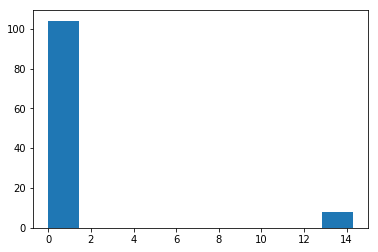

In [91]:
start_scores = new_groups.scores
plt.hist(start_scores)


In [92]:
new_groups.steps = 15000#15000
new_groups.Tmax = 70
new_groups.Tmin = 0.001

In [93]:

itinerary, miles = new_groups.anneal()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00100          4.81     5.33%     2.00%    22:02:07     0:00:00

In [94]:
new_groups.sub_scores

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.10136986e-01, 2.42291407e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.66666667e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.57575758e-01],
       [1.66666667e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.03030303e-02],
       [1.66666667e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.41095890e-02, 3.90452470e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.21643836e-01, 1.65877958e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3

In [95]:
SF_data.columns.values

array(['Employee #', 'Last name, First name', 'Employment Status',
       'Employment Status: Date', 'Division', 'Department',
       'Physical Location', 'business_lead_em_id', 'discipline', 'em_id',
       'email_address', 'employee_type', 'first_name', 'hired_at', 'id',
       'is_active', 'journey_role', 'last_name', 'title',
       'visible_in_newtube', 'years_worked_here'], dtype=object)

In [96]:
count = 0 
discipline_count = []
journey_count = []
studio_count = []
for group in itinerary:
    print('count ', count)
    print('score ', new_groups.scores[count])
    print('subscores ', new_groups.sub_scores[count]) #title, shared projects, division, bl_overlap, #tenure
    disciplines = len(set(SF_data[SF_data.em_id.isin(group)]['discipline'].values))
    journey_count.append(len(set(SF_data[SF_data.em_id.isin(group)]['title'].values)))
    studio_count.append(len(set(SF_data[SF_data.em_id.isin(group)]['Division'].values)))
    discipline_count.append(disciplines)
    print(SF_data[SF_data.em_id.isin(group)][['Last name, First name','Division','discipline', 'title', 'hired_at']])
    print(' ')
    print(' ')
    count += 1


count  0
score  0.24229140722291406
subscores  [0.         0.         1.         0.         0.         0.11013699
 0.24229141]
    Last name, First name     Division           discipline       title  \
119       Higham, Matthew    Palo Alto  Business Operations    Director   
164            Lee, Chloe  SF Hatchery   Interaction Design  Individual   
261  Santhanam, Sangeetha    Palo Alto         Coordination        Team   

       hired_at  
119  2018-08-21  
164  2017-04-03  
261  2014-09-29  
 
 
count  1
score  0.0
subscores  [0. 0. 0. 0. 0. 0. 0.]
    Last name, First name     Division             discipline       title  \
109       Halls, Jennifer       SF D4L        Business Design  Individual   
117      Herrmann, Fabian  SF Hatchery  Comm Design - Graphic    Director   
246    Ridenour , Matthew  SF OpenIDEO              Community        Team   

       hired_at  
109  2018-07-09  
117  2013-01-02  
246  2016-07-25  
 
 
count  2
score  0.25757575757575757
subscores  [0.1666666

268  2017-04-03  
 
 
count  23
score  0.01515151515151515
subscores  [0.08333333 0.         0.         0.         0.         0.
 0.01515152]
    Last name, First name   Division           discipline       title  \
152             Kim, Erin     IDEO U  Comm Design - Media  Individual   
210       O'Malley, Susan      CoLab      Business Design    Director   
231       Prevost, Coline  Palo Alto    Industrial Design  Individual   

       hired_at  
152  2019-04-22  
210  2012-11-05  
231  2017-05-15  
 
 
count  24
score  0.0
subscores  [0. 0. 0. 0. 0. 0. 0.]
    Last name, First name   Division             discipline       title  \
22   Bell-Mayeda, Melanie     SF D4C                  Brand  Enterprise   
224         Pelsoh, Brian     SF D4L  Comm Design - Graphic        Team   
289          Sun, Yicheng  Palo Alto        Software Design  Individual   

       hired_at  
22   2007-03-19  
224  2019-01-02  
289  2017-09-25  
 
 
count  25
score  0.018904109589041082
subscores  [0.     

    Last name, First name   Division            discipline       title  \
181      Luong, Mackenzie     SF D4C   Organization Design  Individual   
284      Stillion, Daniel  Palo Alto    Interaction Design  Enterprise   
314        Voskuil, Caryn     Global  Business Development        Team   

       hired_at  
181  2017-07-10  
284  1996-06-21  
314  2014-06-16  
 
 
count  51
score  0.0
subscores  [0. 0. 0. 0. 0. 0. 0.]
     Last name, First name     Division         discipline       title  \
131      Janakiram, Jamila       SF D4L    Business Design        Team   
202  Montgomery, Margarita  SF Hatchery    Design Research  Individual   
217       Overthun, Thomas        SF OS  Industrial Design  Enterprise   

       hired_at  
131  2018-04-02  
202  2018-09-10  
217  1993-11-15  
 
 
count  52
score  0.01515151515151515
subscores  [0.08333333 0.         0.         0.         0.         0.
 0.01515152]
    Last name, First name     Division             discipline       title  \
41

    Last name, First name       Division              discipline       title  \
6            Amyx, Amanda         SF D4C         Design Research  Individual   
54           Chow, Sophie  IDEO Products      Interaction Design        Team   
170         Leung, Albert      Palo Alto  Mechanical Engineering    Director   

       hired_at  
6    2018-03-19  
54   2017-03-13  
170  2012-08-13  
 
 
count  77
score  0.02129514321295143
subscores  [0.         0.         0.         0.         0.         0.15616438
 0.02129514]
    Last name, First name     Division       discipline       title  \
36       Canada, Margaret  SF Hatchery     Coordination  Individual   
71           Elias, Paulo       Global  Software Design        Team   
158            Koy, Kevin        SF OS     Data Science    Director   

       hired_at  
36   2015-02-09  
71   2015-06-29  
158  2019-04-29  
 
 
count  78
score  0.08196762141967621
subscores  [0.         0.         0.         0.         0.         0.60109589

    Last name, First name   Division             discipline       title  \
20         Barron, Daniel     Global                  Legal  Individual   
79        Farrell, Eileen      SF OS                 Talent        Team   
216        Orth, Jennifer  Palo Alto  Comm Design - Graphic    Director   

       hired_at  
20   2015-11-02  
79   2013-08-05  
216  2018-12-10  
 
 
count  99
score  0.01515151515151515
subscores  [0.08333333 0.         0.         0.         0.         0.
 0.01515152]
    Last name, First name     Division          discipline       title  \
103         Gurney, Elana  SF OpenIDEO           Marketing  Individual   
230        Press, Allison       SF D4L  Interaction Design  Individual   
317        Webster, David    Palo Alto      Product Design  Enterprise   

       hired_at  
103  2016-01-11  
230  2017-06-12  
317  1997-09-01  
 
 
count  100
score  0.0303030303030303
subscores  [0.16666667 0.         0.         0.         0.         0.
 0.03030303]
    Last n

(array([  0.,   0.,   0.,   0.,   0., 112.,   0.,   0.,   0.,   0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
 <a list of 10 Patch objects>)

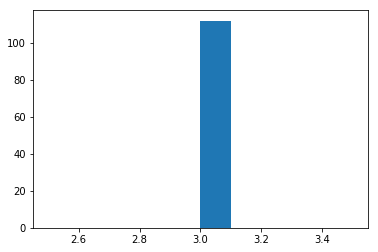

In [97]:
# remove Tim Brown?
# envision outpost in Asia
# take out people who are based in GFL - ask Britta or Khaled
plt.hist(discipline_count)

(array([38.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 74.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 10 Patch objects>)

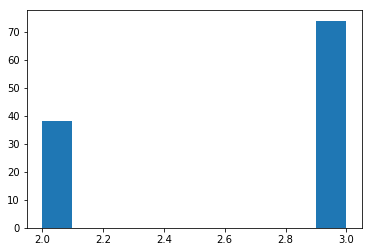

In [98]:
plt.hist(journey_count)

(array([  8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 104.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 10 Patch objects>)

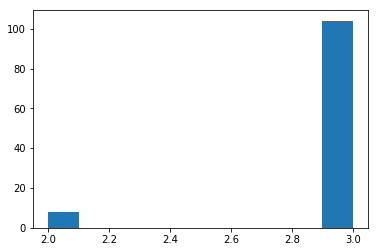

In [99]:
plt.hist(studio_count)

In [101]:
print(len(itinerary))

112


In [105]:
112*60

6720

(array([73., 17., 10.,  1.,  0.,  1.,  0.,  6.,  3.,  1.]),
 array([0.        , 0.03118389, 0.06236779, 0.09355168, 0.12473557,
        0.15591947, 0.18710336, 0.21828726, 0.24947115, 0.28065504,
        0.31183894]),
 <a list of 10 Patch objects>)

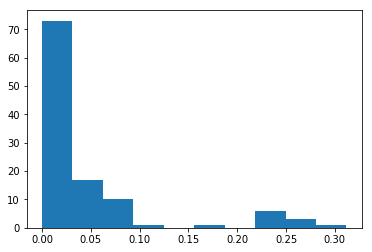

In [100]:
plt.hist(new_groups.scores)

In [71]:
import pandas as pd

groups = pd.DataFrame(itinerary)
groups.rename(index=str, columns={0: "p1", 1: "p2", 2:'p3'})

,p1,p2,p3
0,7232,6848,5309
1,6752,6655,4600
2,6546,6860,4402
3,3370,5965,6571
4,6526,1718,6759
5,7050,5270,6630
6,7138,5625,6661
7,6071,3113,7199
8,6366,5997,6441
9,6498,6818,3543


In [61]:
for i in range(len(itinerary)):
    
    num_shared = shared_projects(itinerary[i])
    if num_shared > 3:
        print(i, num_shared)

In [72]:
groups.to_csv('group_test_Monday_july1st_2.csv')

In [ ]:
for group in itinerary:
    